https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2017_2021

In [120]:
df = pd.read_csv("../Data/data_2017_2021.csv")

In [121]:
df.shape

(765, 14)

- Data Preparation and Cleaning:
        Handle missing values, NaNs, and duplicates in the dataset.
        Extract relevant features and columns from the dataset.

- Calculating Scores:
        Calculate the total score for each gymnast based on their D_Score, E_Score, and Penalty.

- Selecting Athletes:
        Create a function to evaluate the performance of each gymnast and select the best team based on different criteria (e.g., total medal count, gold medals, weighted medal count).

- Team Composition and Optimization:
        Define rules for team composition (e.g., team size, maximum number of athletes per country).
        Optimize the team composition by iterating through different combinations of athletes and evaluating their performance.

- Medal Count Simulation:
        Simulate the scoring and medal distribution for each event based on the selected team.

- Analysis and Comparison:
        Compare the results of different team compositions and optimization criteria.
        Analyze how team composition impacts medal count in different events.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LastName     765 non-null    object 
 1   FirstName    765 non-null    object 
 2   Gender       765 non-null    object 
 3   Country      765 non-null    object 
 4   Date         765 non-null    object 
 5   Competition  765 non-null    object 
 6   Round        765 non-null    object 
 7   Location     765 non-null    object 
 8   Apparatus    765 non-null    object 
 9   Rank         761 non-null    float64
 10  D_Score      761 non-null    float64
 11  E_Score      761 non-null    float64
 12  Penalty      90 non-null     float64
 13  Score        758 non-null    float64
dtypes: float64(5), object(9)
memory usage: 83.8+ KB


In [123]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Combine FirstName and LastName to create 'Name' column
df['Name'] = df['FirstName'] + " " + df['LastName']

# Drop FirstName and LastName columns
df = df.drop(columns=["LastName", "FirstName"])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [124]:
df[['Penalty']] = df[['Penalty']].fillna(0)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       765 non-null    object        
 1   Country      765 non-null    object        
 2   Date         765 non-null    datetime64[ns]
 3   Competition  765 non-null    object        
 4   Round        765 non-null    object        
 5   Location     765 non-null    object        
 6   Apparatus    765 non-null    object        
 7   Rank         761 non-null    float64       
 8   D_Score      761 non-null    float64       
 9   E_Score      761 non-null    float64       
 10  Penalty      765 non-null    float64       
 11  Score        758 non-null    float64       
 12  Name         765 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 77.8+ KB


In [126]:
df["Apparatus"]


0      BB
1      FX
2      UE
3      VT
4      BB
       ..
760    VT
761    BB
762    FX
763    UE
764    VT
Name: Apparatus, Length: 765, dtype: object

In [127]:
df["Gender"].value_counts()

Gender
w    765
Name: count, dtype: int64

In [128]:
df = df[df["Gender"]=="w"]

In [129]:
df.head()

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,HADI ABDUL
1,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.6,7.633,0.0,12.233,HADI ABDUL
2,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,74.0,5.1,6.500,0.0,11.600,HADI ABDUL
3,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,72.0,4.6,8.566,0.0,13.166,HADI ABDUL
4,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,Farah Ann ABDUL HADI


In [136]:
df["Apparatus"].unique()

array(['BB', 'FX', 'UE', 'VT', 'VT1', 'VT2'], dtype=object)

In [137]:
df_copy = df.copy()

In [138]:
df_copy.head()

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,HADI ABDUL
1,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.6,7.633,0.0,12.233,HADI ABDUL
2,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,74.0,5.1,6.500,0.0,11.600,HADI ABDUL
3,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,72.0,4.6,8.566,0.0,13.166,HADI ABDUL
4,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,Farah Ann ABDUL HADI


In [139]:
# Define the values to be replaced and their replacements
replace_dict = {'VT1': 'VT', 'VT2': 'VT'}

# Use .replace() with the defined dictionary
df_copy['Apparatus'] = df_copy['Apparatus'].replace(replace_dict)

In [140]:
df_copy['Apparatus'].value_counts()

Apparatus
BB    204
UE    203
FX    200
VT    158
Name: count, dtype: int64

In [141]:
df_copy.head()

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,HADI ABDUL
1,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.6,7.633,0.0,12.233,HADI ABDUL
2,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,74.0,5.1,6.500,0.0,11.600,HADI ABDUL
3,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,72.0,4.6,8.566,0.0,13.166,HADI ABDUL
4,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,Farah Ann ABDUL HADI


In [142]:
df_copy = df_copy.drop(columns=["Gender", "Country", "Competition", "Round",
                                "Location", "Name"])

In [145]:
df_copy.head()

,Date,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,2021-07-25,BB,76.0,4.8,6.766,0.0,11.566
1,2021-07-25,FX,64.0,4.6,7.633,0.0,12.233
2,2021-07-25,UE,74.0,5.1,6.500,0.0,11.600
3,2021-07-25,VT,72.0,4.6,8.566,0.0,13.166
4,2021-07-25,BB,76.0,4.8,6.766,0.0,11.566


In [146]:
bb = df_copy[df_copy["Apparatus"] == "BB"]


In [147]:
fx = df_copy[df_copy["Apparatus"] == "FX"]

In [148]:
vt = df_copy[df_copy["Apparatus"] == "VT"]

In [163]:
ub = df_copy[df_copy["Apparatus"] == "UE"]

In [150]:
bb = bb.drop(columns=["Apparatus"])

In [151]:
bb

,Date,Rank,D_Score,E_Score,Penalty,Score
0,2021-07-25,76.0,4.8,6.766,0.0,11.566
4,2021-07-25,76.0,4.8,6.766,0.0,11.566
8,2021-07-25,59.0,5.1,7.166,0.0,12.266
9,2021-07-25,59.0,5.1,7.166,0.0,12.266
19,2021-07-25,37.0,5.3,7.666,0.0,12.966
...,...,...,...,...,...,...
746,2021-07-25,10.0,6.0,7.966,0.0,13.966
747,2021-07-25,10.0,6.0,7.966,0.0,13.966
753,2021-07-29,18.0,5.2,6.966,0.0,12.166
754,2021-07-25,26.0,5.3,7.933,0.0,13.233


In [152]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 761
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     204 non-null    datetime64[ns]
 1   Rank     204 non-null    float64       
 2   D_Score  204 non-null    float64       
 3   E_Score  204 non-null    float64       
 4   Penalty  204 non-null    float64       
 5   Score    203 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.2 KB


In [153]:
bb = bb.dropna()

In [154]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 761
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     203 non-null    datetime64[ns]
 1   Rank     203 non-null    float64       
 2   D_Score  203 non-null    float64       
 3   E_Score  203 non-null    float64       
 4   Penalty  203 non-null    float64       
 5   Score    203 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.1 KB


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Balance Beam

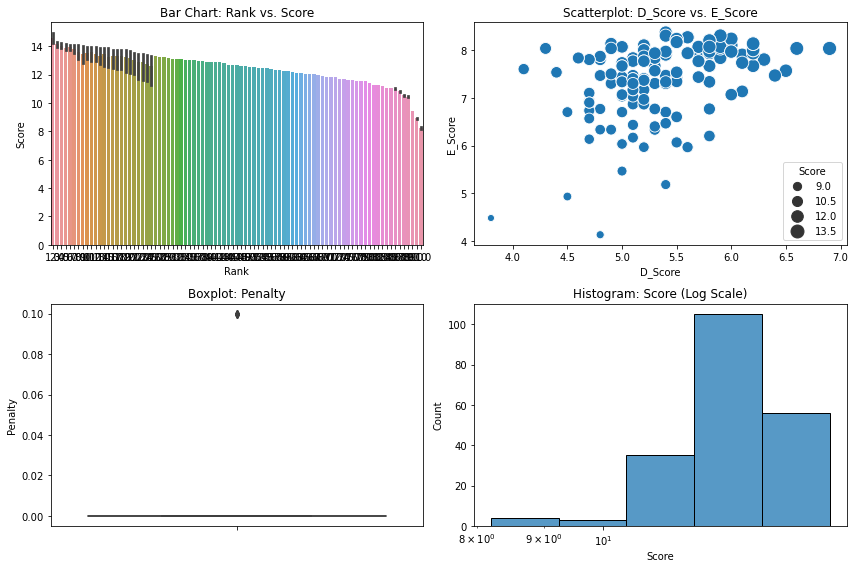

In [156]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=bb, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=bb, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=bb, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=bb, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

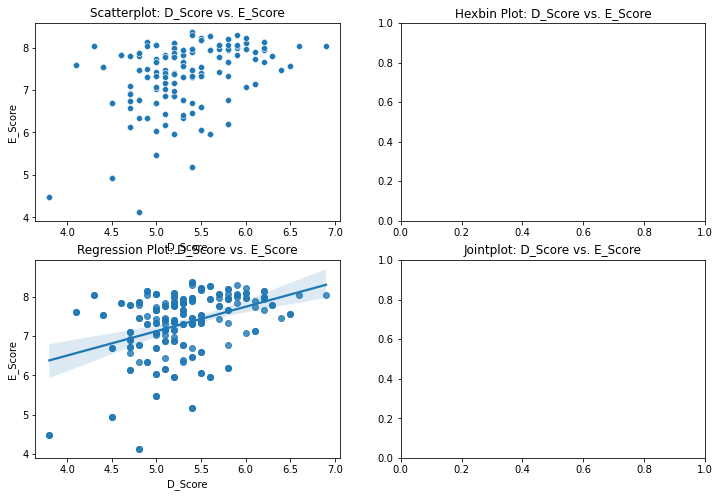

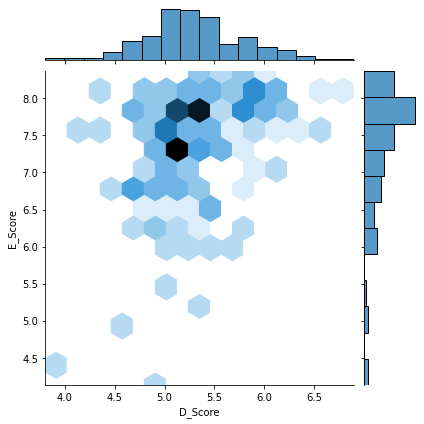

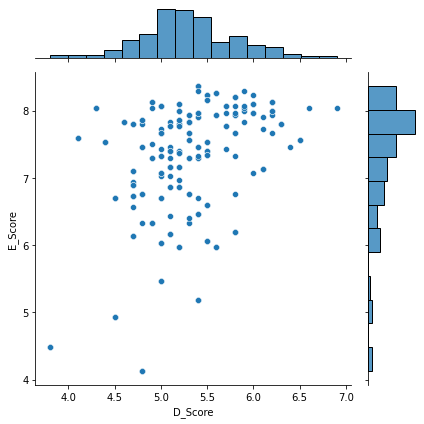

Correlation Coefficient between D_Score and E_Score: 0.38


In [157]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=bb, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=bb, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(bb['D_Score']), max(bb['D_Score'])), ylim=(min(bb['E_Score']), max(bb['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=bb, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=bb, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Compute and display correlation coefficient
correlation_coefficient = bb['D_Score'].corr(bb['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')


# Floor

In [100]:
fx = fx.drop(columns=["Apparatus"])
fx.head()

,FirstName,Rank,D_Score,E_Score,Penalty,Score
113,Jana,109.0,4.400,7.466,0.1,11.766
114,Jana,109.0,7.466,4.400,0.1,11.766
123,Jana,22.0,4.500,7.366,NaN,11.866
157,Kumudi Imanya,39.0,4.450,2.900,NaN,7.350
164,Jana,74.0,4.400,7.866,NaN,12.266


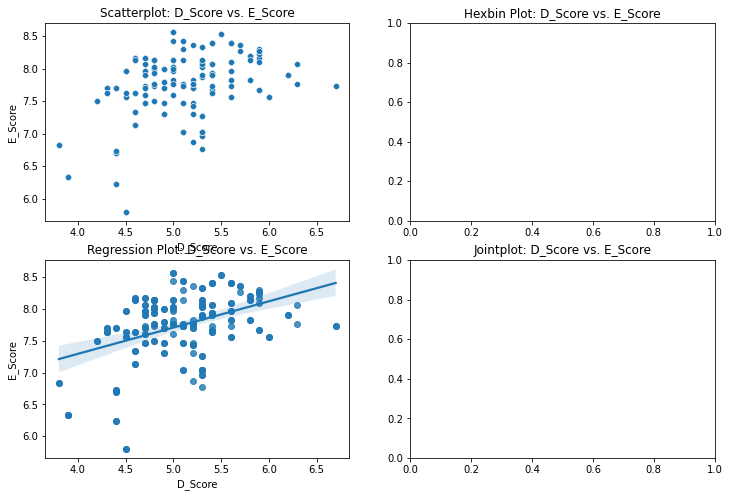

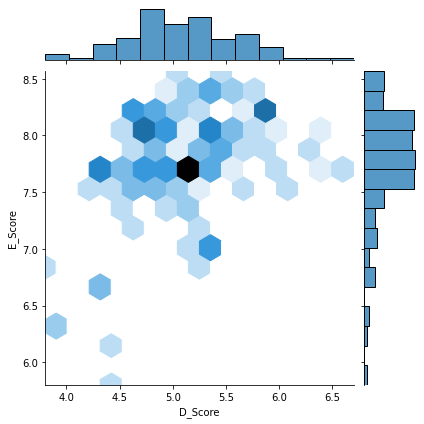

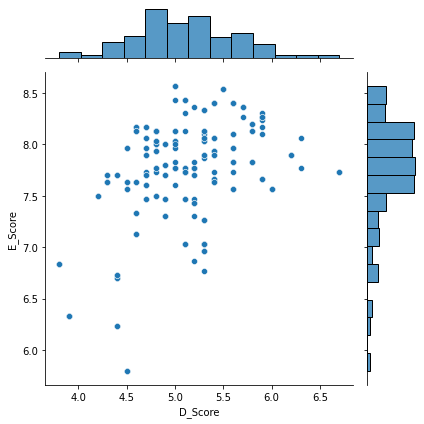

Correlation Coefficient between D_Score and E_Score: 0.43


In [158]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=fx, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=fx, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(fx['D_Score']), max(fx['D_Score'])), ylim=(min(fx['E_Score']), max(fx['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=fx, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=fx, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Compute and display correlation coefficient
correlation_coefficient = fx['D_Score'].corr(fx['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')


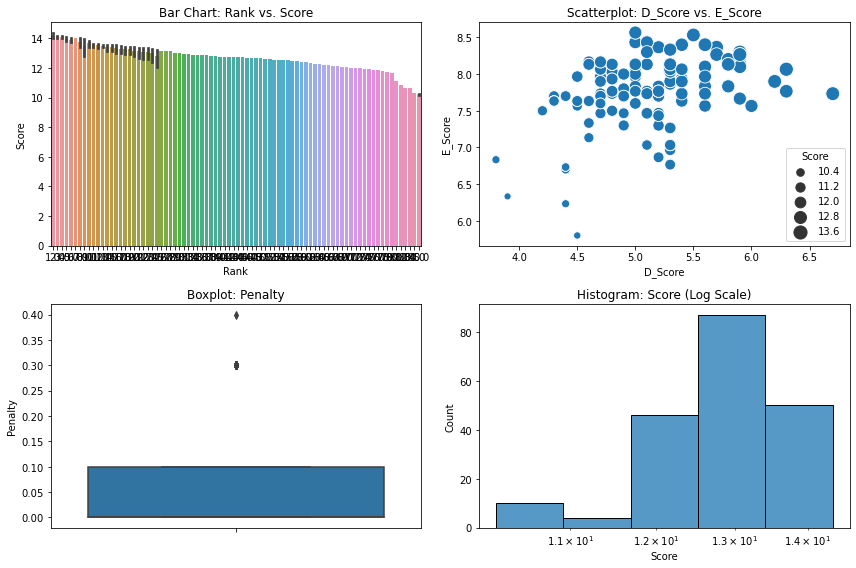

In [159]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=fx, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=fx, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=fx, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=fx, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Vault

In [160]:
vt = vt.drop(columns=["Apparatus"])
vt.head()

,Date,Rank,D_Score,E_Score,Penalty,Score
3,2021-07-25,72.0,4.6,8.566,0.0,13.166
14,2021-07-25,10.0,5.8,8.966,0.0,14.766
15,2021-07-25,7.0,5.8,8.966,0.0,14.766
16,2021-08-01,6.0,5.8,8.866,0.1,14.666
17,2021-07-25,7.0,5.6,9.033,0.0,14.633


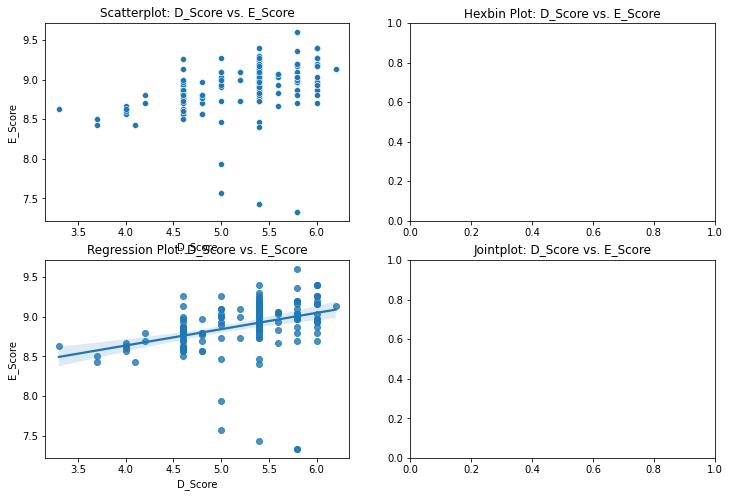

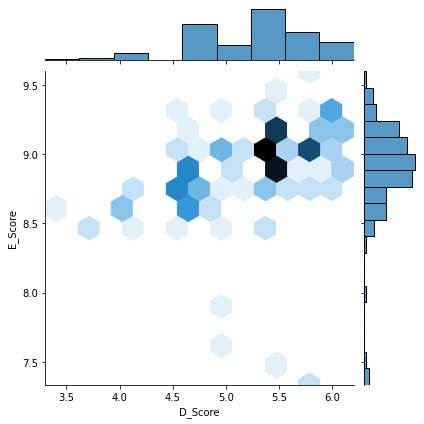

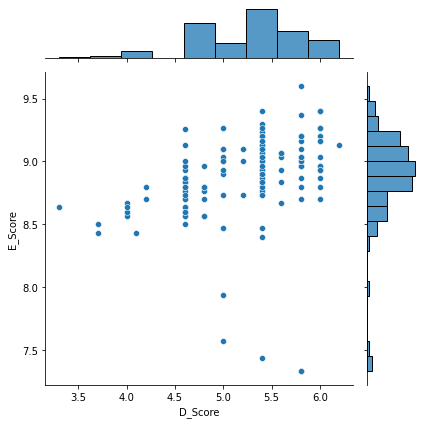

Correlation Coefficient between D_Score and E_Score: 0.35


In [161]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=vt, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=vt, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(vt['D_Score']), max(vt['D_Score'])), ylim=(min(vt['E_Score']), max(vt['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=vt, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=vt, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Compute and display correlation coefficient
correlation_coefficient = vt['D_Score'].corr(vt['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')


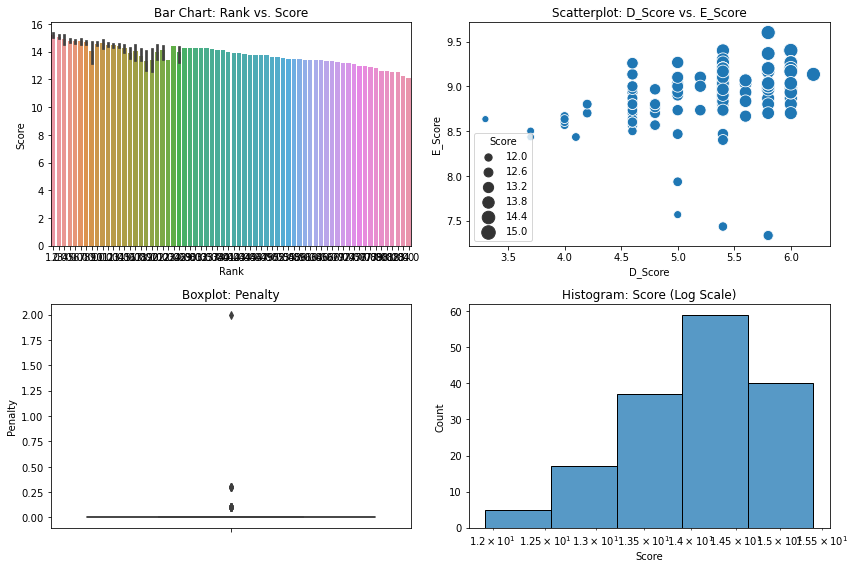

In [166]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=vt, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=vt, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=vt, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=vt, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

## Uneven Bars

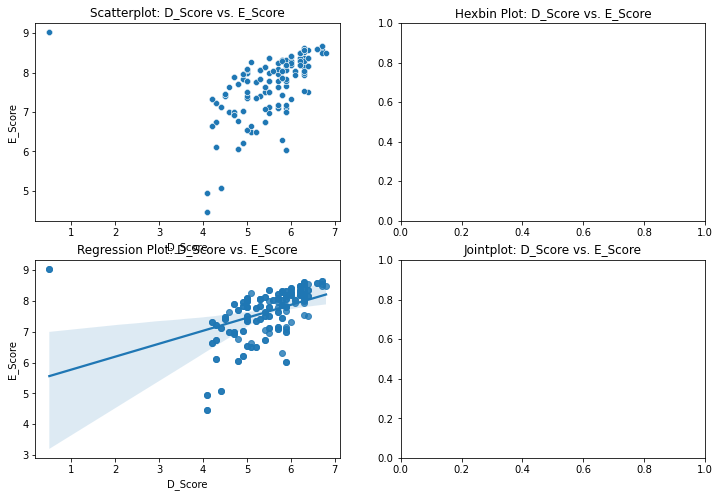

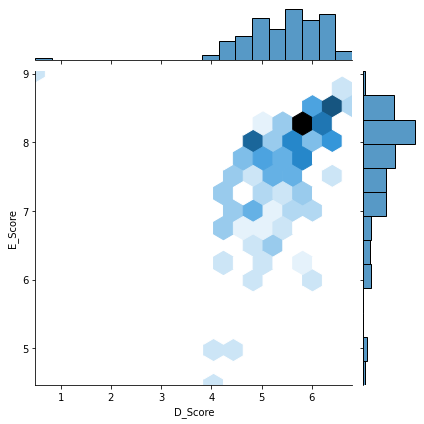

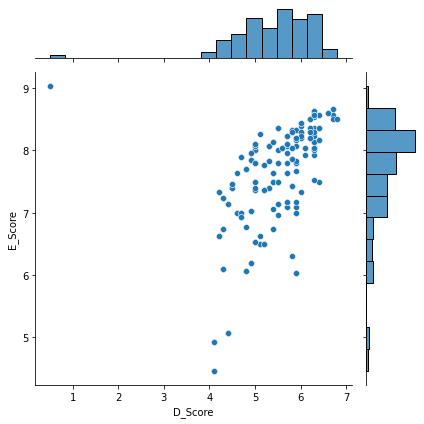

Correlation Coefficient between D_Score and E_Score: 0.43


In [165]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=ub, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=ub, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(ub['D_Score']), max(ub['D_Score'])), ylim=(min(ub['E_Score']), max(ub['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=ub, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=ub, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Compute and display correlation coefficient
correlation_coefficient = ub['D_Score'].corr(ub['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')


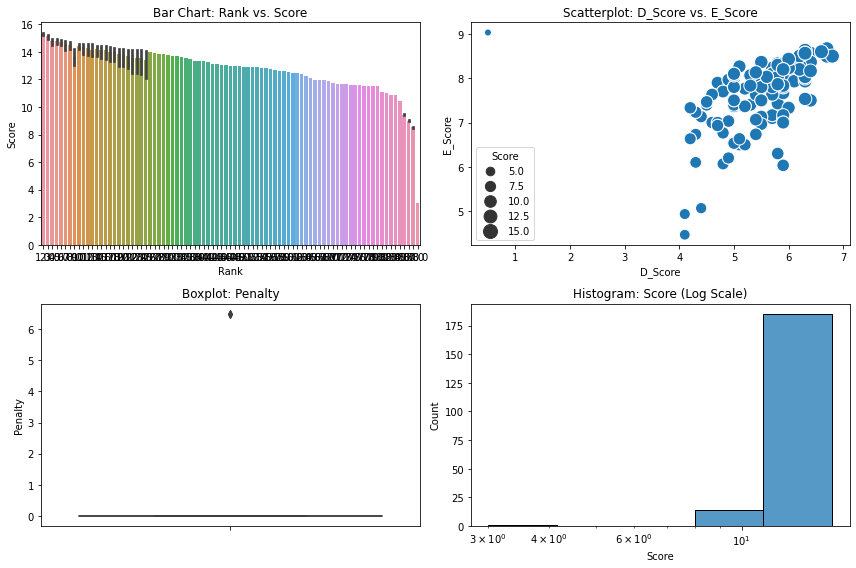

In [167]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=ub, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=ub, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=ub, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=ub, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

---

# 2022-2023

In [375]:
df = pd.read_csv("../Data/data_2022_2023.csv")

In [376]:
df.head()

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,AAS,Fredrik,m,NOR,23-26 Feb 2023,FIG Apparatus World Cup 2023,qual,"Cottbus, Germany",HB,39.0,4.600,6.7,NaN,11.300
1,AAS,Fredrik,m,NOR,23-26 Feb 2023,FIG Apparatus World Cup 2023,qual,"Cottbus, Germany",PH,44.0,4.400,7.8,NaN,12.200
2,AAS,Fredrik Bjornevik,m,NOR,1-5 Aug 2023,2023 FISH World University Games,qual,"Chengdu, China",FX,54.0,8.566,4.0,NaN,12.566
3,AAS,Fredrik Bjornevik,m,NOR,1-5 Aug 2023,2023 FISH World University Games,qual,"Chengdu, China",HB,44.0,8.166,4.6,NaN,12.766
4,AAS,Fredrik Bjornevik,m,NOR,1-5 Aug 2023,2023 FISH World University Games,qual,"Chengdu, China",PB,54.0,8.066,4.4,NaN,12.466


In [377]:
df["Date"].value_counts()

Date
29 Oct 2022 - 6 Nov 2022    2523
11-16 Apr 2023              1607
1-5 Aug 2023                 956
18-21 Aug 2022               881
29 Jul-2 Aug, 2023           646
17-19 Mar 2023               643
11-14 Aug 2022               628
24-28 Jun 2023               627
24-27 Mar 2022               583
23-26 Feb 2023               571
9–12 Mar 2023                541
23-26 Mar 2023               493
27–30 Apr 2023               467
1-4 Mar 2023                 455
8-11 Jun 2023                395
25-28 May 2023               342
1-4 Jun 2023                 271
05-06 May 2023                47
Name: count, dtype: int64

In [378]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Combine FirstName and LastName to create 'Name' column
df['Name'] = df['FirstName'] + " " + df['LastName']

# Drop FirstName and LastName columns
df = df.drop(columns=["LastName", "FirstName"])

# THIS WILL CAUSE ERRORS WITH DATE
# Convert 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12676 entries, 0 to 12675
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       12676 non-null  object 
 1   Country      12464 non-null  object 
 2   Date         12676 non-null  object 
 3   Competition  12676 non-null  object 
 4   Round        12676 non-null  object 
 5   Location     12676 non-null  object 
 6   Apparatus    12676 non-null  object 
 7   Rank         12433 non-null  float64
 8   D_Score      12526 non-null  float64
 9   E_Score      12451 non-null  float64
 10  Penalty      2869 non-null   float64
 11  Score        12524 non-null  float64
 12  Name         12631 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.3+ MB


In [380]:
df["Gender"].value_counts()

Gender
m    7668
w    5008
Name: count, dtype: int64

In [381]:
df = df[df["Gender"]=="w"]

In [382]:
df = df.drop(columns=["Gender", "Country", "Competition", "Round", "Location", "Name"])

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 111 to 12675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5008 non-null   object 
 1   Apparatus  5008 non-null   object 
 2   Rank       4972 non-null   float64
 3   D_Score    4966 non-null   float64
 4   E_Score    4911 non-null   float64
 5   Penalty    1291 non-null   float64
 6   Score      4966 non-null   float64
dtypes: float64(5), object(2)
memory usage: 313.0+ KB


In [384]:
df_copy = df.copy()

In [385]:
df_copy[['Penalty']] = df_copy[['Penalty']].fillna(0)

In [386]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 111 to 12675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5008 non-null   object 
 1   Apparatus  5008 non-null   object 
 2   Rank       4972 non-null   float64
 3   D_Score    4966 non-null   float64
 4   E_Score    4911 non-null   float64
 5   Penalty    5008 non-null   float64
 6   Score      4966 non-null   float64
dtypes: float64(5), object(2)
memory usage: 313.0+ KB


In [387]:
# Extract the start date and end date from the 'Date' column
date_parts = df_copy['Date'].str.split('-', expand=True)
df_copy['Start Date'] = pd.to_datetime(date_parts[0], errors='coerce', format='%d %b %Y')
df_copy['End Date'] = pd.to_datetime(date_parts[1], errors='coerce', format='%d %b %Y')




In [388]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 111 to 12675
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5008 non-null   object        
 1   Apparatus   5008 non-null   object        
 2   Rank        4972 non-null   float64       
 3   D_Score     4966 non-null   float64       
 4   E_Score     4911 non-null   float64       
 5   Penalty     5008 non-null   float64       
 6   Score       4966 non-null   float64       
 7   Start Date  0 non-null      datetime64[ns]
 8   End Date    4381 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(2)
memory usage: 391.2+ KB


In [389]:
df_copy= df_copy.drop(columns=["Date", "Start Date"])

In [390]:
df_copy["Date"] = df_copy["End Date"]

In [391]:
df_copy = df_copy.drop(columns=["End Date"])

In [393]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 111 to 12675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Apparatus  5008 non-null   object        
 1   Rank       4972 non-null   float64       
 2   D_Score    4966 non-null   float64       
 3   E_Score    4911 non-null   float64       
 4   Penalty    5008 non-null   float64       
 5   Score      4966 non-null   float64       
 6   Date       4381 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 313.0+ KB


In [394]:
df_copy["Date"].value_counts()

Date
2022-11-06    1043
2022-08-14     628
2023-04-16     626
2022-03-27     308
2023-08-05     295
2023-06-28     272
2023-03-26     226
2023-03-19     217
2023-02-26     179
2023-06-11     164
2023-03-04     147
2023-05-28     147
2023-06-04     129
Name: count, dtype: int64

In [395]:
df_copy["Apparatus"].unique()

array(['BB', 'FX', 'UB', 'VT', 'VT1', 'VT2', 'VT_1', 'VT_2'], dtype=object)

In [396]:
# Define the values to be replaced and their replacements
replace_dict = {'VT1': 'VT', 'VT2': 'VT', 'VT_1': 'VT', 'VT_2': "VT"}

# Use .replace() with the defined dictionary
df_copy['Apparatus'] = df_copy['Apparatus'].replace(replace_dict)

In [397]:
df_copy["Apparatus"].value_counts()

Apparatus
VT    1354
BB    1268
UB    1195
FX    1191
Name: count, dtype: int64

In [398]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 111 to 12675
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Apparatus  5008 non-null   object        
 1   Rank       4972 non-null   float64       
 2   D_Score    4966 non-null   float64       
 3   E_Score    4911 non-null   float64       
 4   Penalty    5008 non-null   float64       
 5   Score      4966 non-null   float64       
 6   Date       4381 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 313.0+ KB


In [399]:
# df_copy=df_copy.drop(columns=["Date"])

In [400]:
# df_copy.info()

In [401]:
df_copy = df_copy.dropna()

In [402]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4267 entries, 111 to 12671
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Apparatus  4267 non-null   object        
 1   Rank       4267 non-null   float64       
 2   D_Score    4267 non-null   float64       
 3   E_Score    4267 non-null   float64       
 4   Penalty    4267 non-null   float64       
 5   Score      4267 non-null   float64       
 6   Date       4267 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 266.7+ KB


In [403]:
bb = df_copy[df_copy["Apparatus"] == "BB"]
vt = df_copy[df_copy["Apparatus"] == "VT"]
fx = df_copy[df_copy["Apparatus"] == "FX"]
ub = df_copy[df_copy["Apparatus"] == "UB"]


In [404]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 111 to 12670
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Apparatus  1094 non-null   object        
 1   Rank       1094 non-null   float64       
 2   D_Score    1094 non-null   float64       
 3   E_Score    1094 non-null   float64       
 4   Penalty    1094 non-null   float64       
 5   Score      1094 non-null   float64       
 6   Date       1094 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 68.4+ KB


# Balance Beam

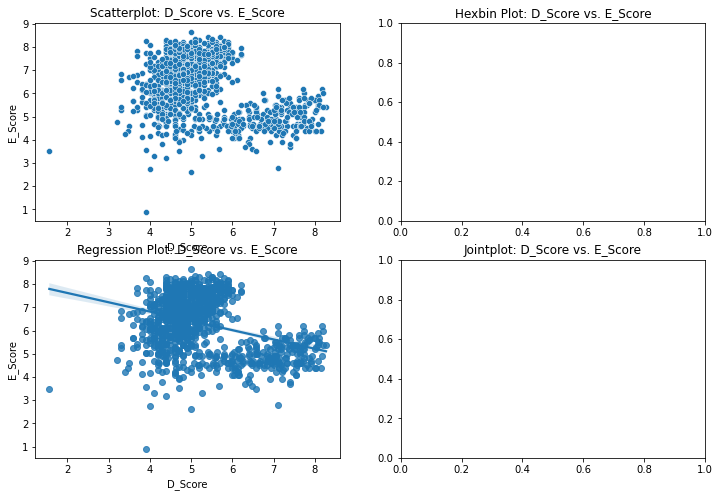

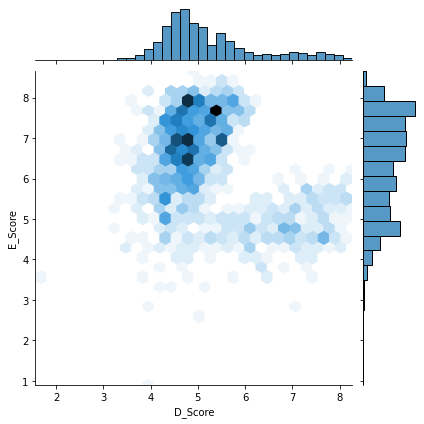

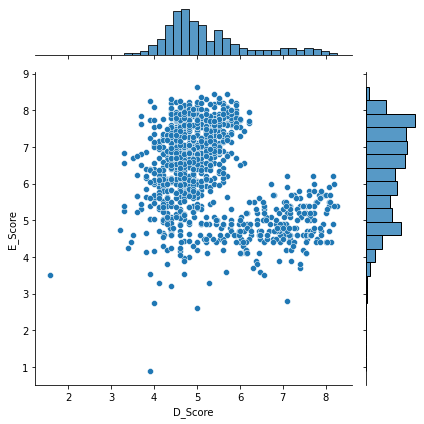

Correlation Coefficient between D_Score and E_Score: -0.34


In [405]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=bb, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=bb, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(bb['D_Score']), max(bb['D_Score'])), ylim=(min(bb['E_Score']), max(bb['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=bb, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=bb, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Compute and display correlation coefficient
correlation_coefficient = bb['D_Score'].corr(bb['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')


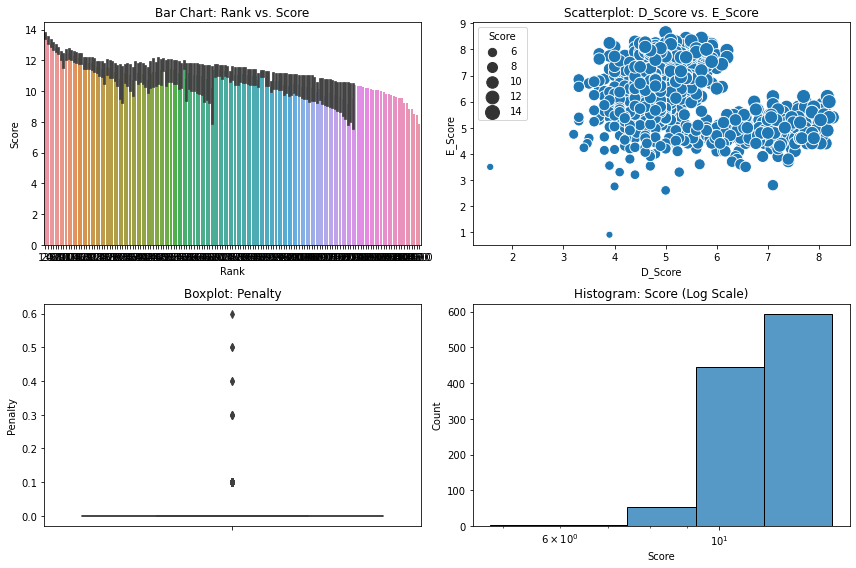

In [406]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=bb, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=bb, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=bb, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=bb, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Floor

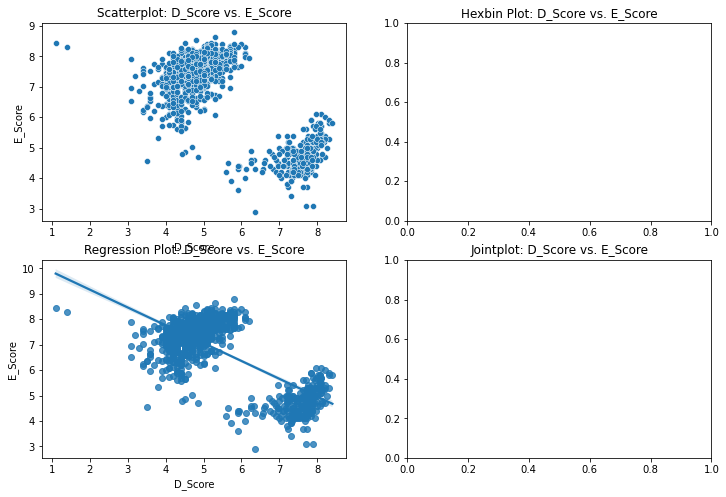

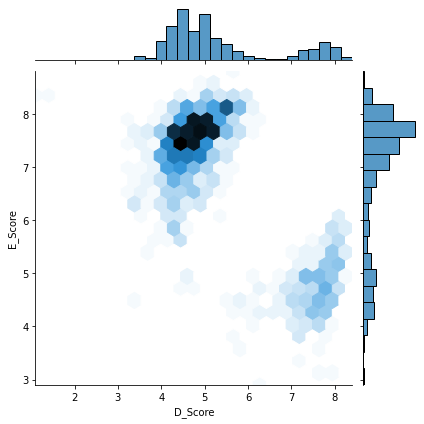

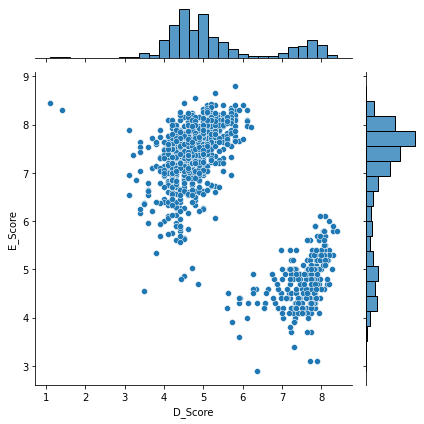

In [407]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=fx, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=fx, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(fx['D_Score']), max(fx['D_Score'])), ylim=(min(fx['E_Score']), max(fx['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=fx, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=fx, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


Correlation Coefficient between D_Score and E_Score: -0.72


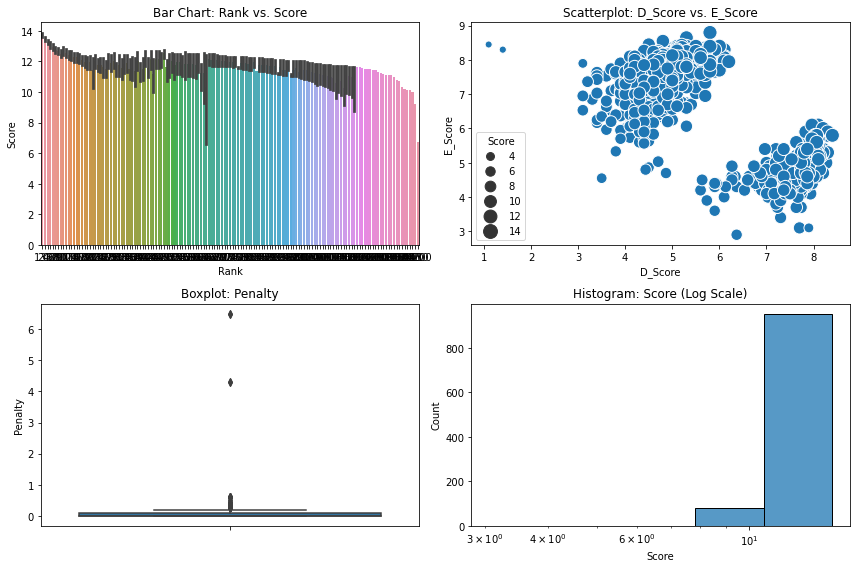

In [408]:

# Compute and display correlation coefficient
correlation_coefficient = fx['D_Score'].corr(fx['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')

# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=fx, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=fx, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=fx, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=fx, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Vault

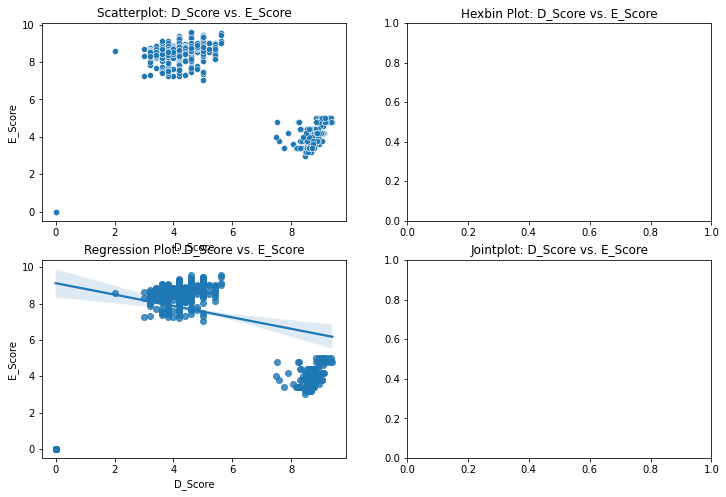

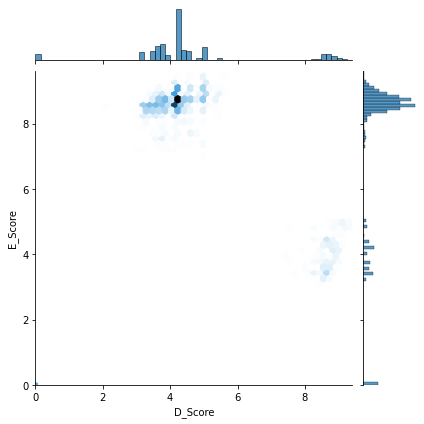

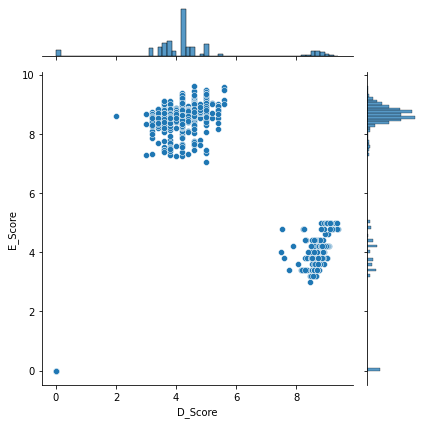

In [409]:

# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=vt, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=vt, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(vt['D_Score']), max(vt['D_Score'])), ylim=(min(vt['E_Score']), max(vt['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=vt, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=vt, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


Correlation Coefficient between D_Score and E_Score: -0.26


ValueError: autodetected range of [-inf, 1.1808710516505438] is not finite

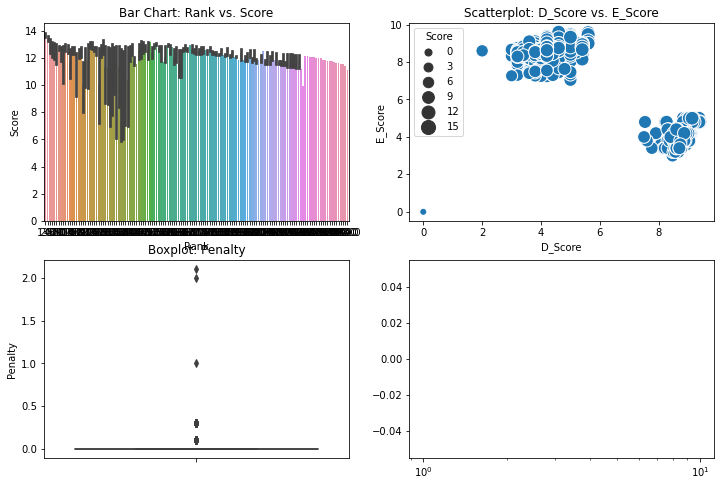

In [436]:

# Compute and display correlation coefficient
correlation_coefficient = vt['D_Score'].corr(vt['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')

# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=vt, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=vt, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=vt, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=vt, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

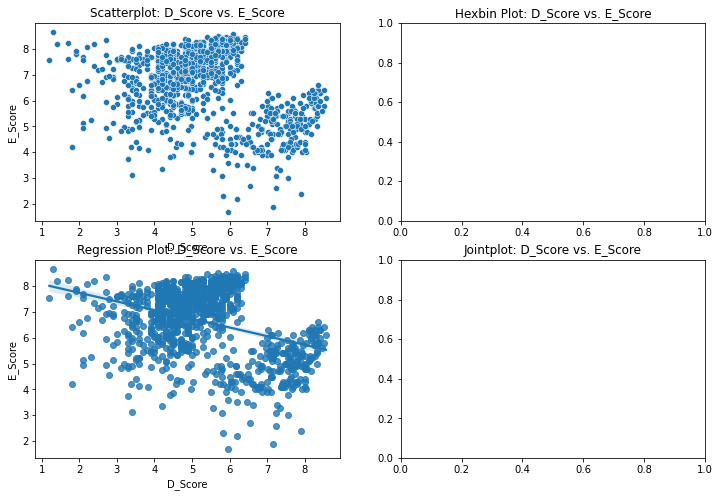

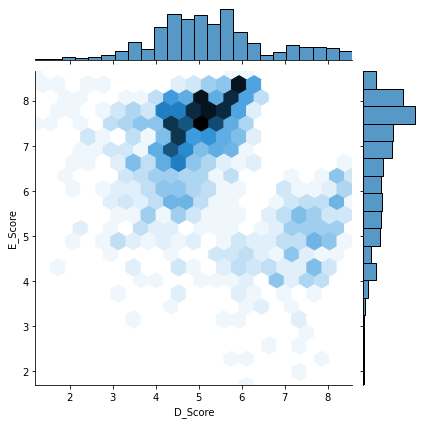

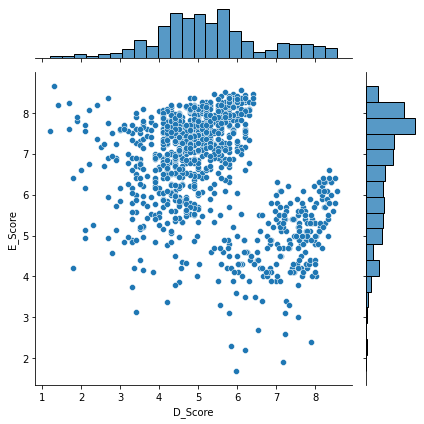

In [411]:
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=ub, x='D_Score', y='E_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 2: Hexbin plot for density of data points
# Adjust xlim and ylim based on your data range
sns.jointplot(data=ub, x='D_Score', y='E_Score', kind='hex', ax=axes[0, 1], xlim=(min(ub['D_Score']), max(ub['D_Score'])), ylim=(min(ub['E_Score']), max(ub['E_Score'])))
axes[0, 1].set_title('Hexbin Plot: D_Score vs. E_Score')

# Plot 3: Regression plot to visualize the linear relationship
sns.regplot(data=ub, x='D_Score', y='E_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. E_Score')

# Plot 4: Jointplot for a deeper look
sns.jointplot(data=ub, x='D_Score', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: D_Score vs. E_Score')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


Correlation Coefficient between D_Score and E_Score: -0.35


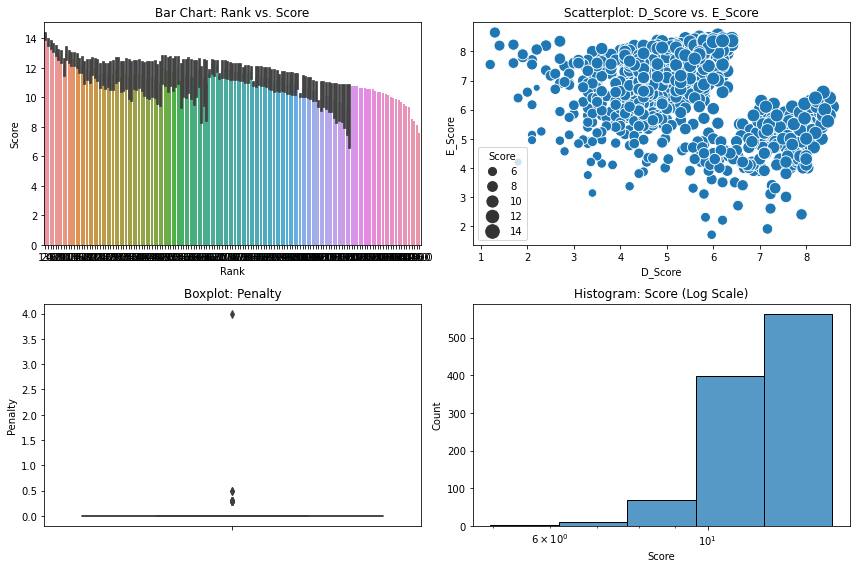

In [412]:

# Compute and display correlation coefficient
correlation_coefficient = ub['D_Score'].corr(ub['E_Score'])
print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient:.2f}')
# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar chart for 'Rank'
sns.barplot(data=ub, x='Rank', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Bar Chart: Rank vs. Score')

# Plot 2: Scatterplot for 'D_Score' vs. 'E_Score'
sns.scatterplot(data=ub, x='D_Score', y='E_Score', size='Score', sizes=(50, 200), ax=axes[0, 1])
axes[0, 1].set_title('Scatterplot: D_Score vs. E_Score')

# Plot 3: Boxplot for 'Penalty'
sns.boxplot(data=ub, y='Penalty', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Penalty')

# Plot 4: Histogram for 'Score' with log scaling
sns.histplot(data=ub, x='Score', bins=5, ax=axes[1, 1], log_scale=True)
axes[1, 1].set_title('Histogram: Score (Log Scale)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

In [413]:
bb = bb.dropna()

In [414]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 111 to 12670
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Apparatus  1094 non-null   object        
 1   Rank       1094 non-null   float64       
 2   D_Score    1094 non-null   float64       
 3   E_Score    1094 non-null   float64       
 4   Penalty    1094 non-null   float64       
 5   Score      1094 non-null   float64       
 6   Date       1094 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 68.4+ KB


In [415]:
bb = bb.drop(columns=["Apparatus"])

In [416]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 111 to 12670
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Rank     1094 non-null   float64       
 1   D_Score  1094 non-null   float64       
 2   E_Score  1094 non-null   float64       
 3   Penalty  1094 non-null   float64       
 4   Score    1094 non-null   float64       
 5   Date     1094 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.8 KB


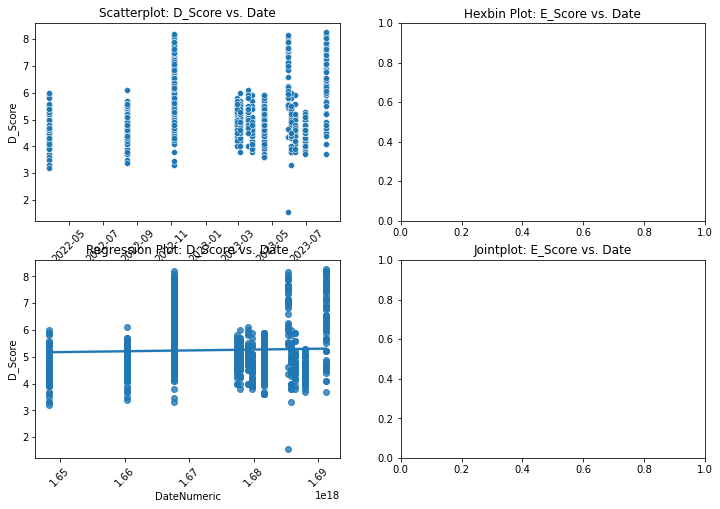

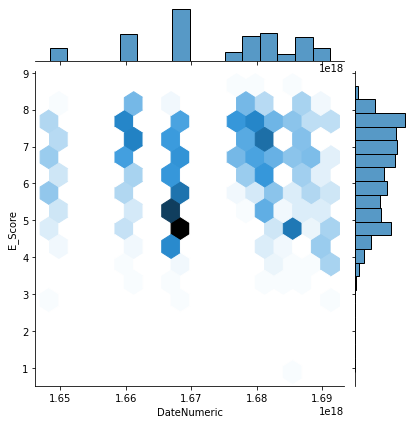

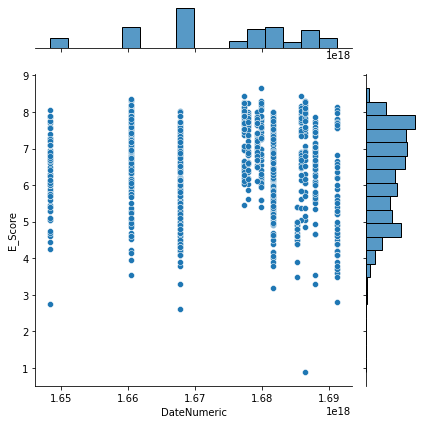

Correlation Coefficient between D_Score and E_Score: -0.34
Correlation Coefficient between D_Score and Score: 0.48
Correlation Coefficient between E_Score and Score: 0.66

Descriptive Statistics:
           D_Score      E_Score        Score
count  1094.000000  1094.000000  1094.000000
mean      5.249374     6.321926    11.556348
std       1.039088     1.221420     1.313941
min       1.566000     0.900000     4.800000
25%       4.600000     5.354000    10.766000
50%       5.000000     6.516500    11.666000
75%       5.600000     7.345750    12.533000
max       8.266000     8.650000    14.360000


In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to numeric timestamps
bb['DateNumeric'] = pd.to_numeric(bb['Date'])

# Create subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Scatterplot for 'D_Score' vs. 'Date'
sns.scatterplot(data=bb, x='Date', y='D_Score', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot: D_Score vs. Date')

# Plot 2: Hexbin plot for density of data points with Date on the x-axis
# Specify the number of bins (gridsize) directly
sns.jointplot(data=bb, x='DateNumeric', y='E_Score', kind='hex', ax=axes[0, 1], gridsize=15)
axes[0, 1].set_title('Hexbin Plot: E_Score vs. Date')

# Plot 3: Regression plot to visualize the linear relationship with Date on the x-axis
sns.regplot(data=bb, x='DateNumeric', y='D_Score', ax=axes[1, 0])
axes[1, 0].set_title('Regression Plot: D_Score vs. Date')

# Plot 4: Jointplot for a deeper look with Date on the x-axis
sns.jointplot(data=bb, x='DateNumeric', y='E_Score', kind='scatter', ax=axes[1, 1])
axes[1, 1].set_title('Jointplot: E_Score vs. Date')

# Rotate x-axis labels for better readability
axes[0, 0].tick_params(axis='x', rotation=45)
axes[1, 0].tick_params(axis='x', rotation=45)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Compute and display correlation coefficients
correlation_coefficient_de = bb['D_Score'].corr(bb['E_Score'])
correlation_coefficient_ds = bb['D_Score'].corr(bb['Score'])
correlation_coefficient_es = bb['E_Score'].corr(bb['Score'])

print(f'Correlation Coefficient between D_Score and E_Score: {correlation_coefficient_de:.2f}')
print(f'Correlation Coefficient between D_Score and Score: {correlation_coefficient_ds:.2f}')
print(f'Correlation Coefficient between E_Score and Score: {correlation_coefficient_es:.2f}')

# Display descriptive statistics
print('\nDescriptive Statistics:')
print(bb[['D_Score', 'E_Score', 'Score']].describe())


In [425]:
bb

,Rank,D_Score,E_Score,Penalty,Score,Date,DateNumeric
111,100.0,4.800,6.200,0.0,11.000,2022-11-06,1667692800000000000
112,100.0,6.200,4.800,0.0,11.000,2022-11-06,1667692800000000000
121,4.0,5.000,8.000,0.0,13.000,2023-03-04,1677888000000000000
122,6.0,5.000,7.933,0.0,12.933,2023-03-04,1677888000000000000
127,41.0,3.700,6.500,0.0,10.200,2022-03-27,1648339200000000000
...,...,...,...,...,...,...,...
12646,29.0,4.200,5.366,0.0,9.566,2023-06-11,1686441600000000000
12654,5.0,4.700,7.966,0.0,12.666,2023-06-11,1686441600000000000
12655,3.0,4.600,8.100,0.0,12.700,2023-06-11,1686441600000000000
12657,11.0,4.500,7.333,0.0,11.833,2023-06-04,1685836800000000000


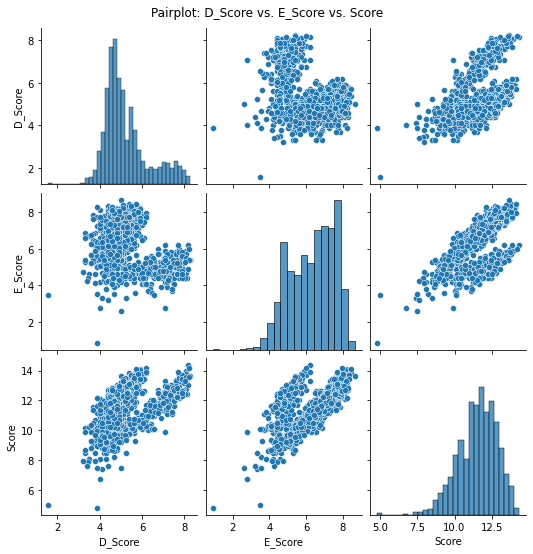

In [418]:
# Pairplot
sns.pairplot(bb[['D_Score', 'E_Score', 'Score']])
plt.suptitle('Pairplot: D_Score vs. E_Score vs. Score', y=1.02)
plt.show()


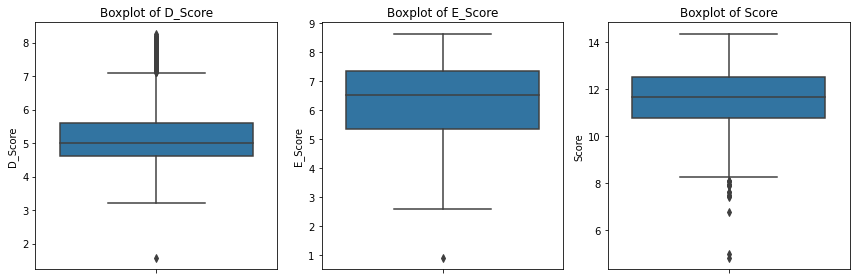

In [419]:
# Boxplots
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.boxplot(data=bb, y='D_Score')
plt.title('Boxplot of D_Score')

plt.subplot(132)
sns.boxplot(data=bb, y='E_Score')
plt.title('Boxplot of E_Score')

plt.subplot(133)
sns.boxplot(data=bb, y='Score')
plt.title('Boxplot of Score')

plt.tight_layout()
plt.show()


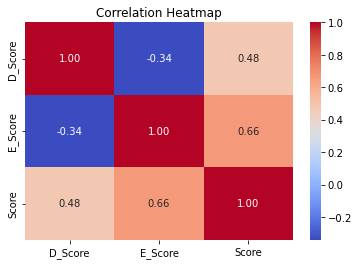

In [420]:
# Correlation heatmap
correlation_matrix = bb[['D_Score', 'E_Score', 'Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [437]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'bb' with the mentioned columns



# Create a time-series graph for 'E_Score' and 'D_Score'
fig = px.line(bb, x='Date', y=['E_Score', 'D_Score'], labels={'variable': 'Score Type'}, title='Time-Series Graph of E_Score and D_Score')
fig.show()


In [422]:
import pandas as pd
import plotly.graph_objects as go



# Create a time-series graph for 'E_Score' and 'D_Score'
fig = go.Figure()

# Add traces for E_Score and D_Score
fig.add_trace(go.Scatter(x=bb['Date'], y=bb['E_Score'], mode='lines', name='E_Score', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=bb['Date'], y=bb['D_Score'], mode='lines', name='D_Score', line=dict(color='green')))

# Customize the layout
fig.update_layout(
    title='Time-Series Graph of E_Score and D_Score',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Score'),
    legend=dict(x=0, y=1),
    autosize=False,
    width=800,
    height=400,
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the plot
fig.show()


In [423]:
bb["Date"].value_counts()

Date
2022-11-06    289
2023-04-16    153
2022-08-14    151
2022-03-27     73
2023-08-05     70
2023-06-28     62
2023-03-26     50
2023-02-26     49
2023-03-19     46
2023-03-04     43
2023-05-28     39
2023-06-11     38
2023-06-04     31
Name: count, dtype: int64